In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from scipy.stats import ttest_ind, linregress
import pickle

In [2]:
os.getcwd()

'C:\\Users\\araddatz3\\Desktop\\Code\\redox_model'

In [3]:
species_names = ['Extracellular H2O2', 'Cytosolic H2O2',
                 'GPXr','GPXo','GPX-SG',
                 'GSH','GSSG',
                 'Cat','Peroxisomal H2O2',
                 'Prx1/2-SH','Prx1/2-SOH','Prx1/2-SOOH','Prx1/2-SS',
                 'Trx1-SH','Trx1-SS','Pr-SH','Pr-SOH','Pr-SSG',
                 'Grx-SH','Grx-SS','Pr-(SH)2','Pr-SS','NADPH','NADP+',
                 'blapQ','blapHQ','blapSQ','superoxide','O2','Extracellular blapQ','blapHQ-SG','Extracellular blapHQ-GSH'
                ]
gene_names = ["GPX1", "GPX2", "GPX3", "GPX4", "GPX5", "GPX6", "GPX7", "GPX8",
                "PRDX1", "PRDX2", "PRDX3", "PRDX6", "CAT", "TXN", "TXN2", "TXNRD1", "TXNRD2", "TXNRD3",
                "GLRX", "GLRX2", "G6PD", "GLUD1", "GSR", "GSTP1", "POR", "NQO1", "SOD1", "SOD2", "SOD3",
                "AQP3","AQP8","AQP9","GCLC"]

In [4]:
ode_header = ["blap " + species_name for species_name in species_names] + gene_names + ["Patient","Cell Type"]
data = pd.read_csv(os.getcwd() + "\\20230112_ode_results.csv",header=None)
data = data.T
data.columns = ode_header

In [5]:
data

,blap Extracellular H2O2,blap Cytosolic H2O2,blap GPXr,blap GPXo,blap GPX-SG,blap GSH,blap GSSG,blap Cat,blap Peroxisomal H2O2,blap Prx1/2-SH,...,NQO1,SOD1,SOD2,SOD3,AQP3,AQP8,AQP9,GCLC,Patient,Cell Type
0,592.35,2003.60,2.271000e-08,0.178040,0.000712,0.383350,1.489500,0.182150,1989.90,3.113000e-08,...,0.023056,1.7263,0.490290,0.210930,0.000685,0.000042,0.000352,0.004199,1.0,1.0
1,167.51,592.49,2.399500e-08,0.006197,0.000025,3.440900,0.165930,0.016880,592.11,9.862500e-07,...,0.011035,2.1716,0.169600,0.064051,0.000685,0.000042,0.000352,0.004199,1.0,1.0
2,3243.00,10110.00,3.862000e-10,0.035077,0.000140,0.166960,1.638100,0.159470,10049.00,1.534900e-09,...,0.050071,1.4888,0.074444,0.039708,0.000695,0.000042,0.000352,0.002240,2.0,0.0
3,550.83,2009.10,3.459500e-07,0.088225,0.000353,11.817000,0.048302,0.006836,2008.60,3.680500e-08,...,0.030950,1.7728,0.245690,0.188660,0.000685,0.000042,0.000352,0.004199,2.0,1.0
4,6224.90,9755.40,2.831900e-09,0.043706,0.000175,0.948150,1.764400,0.233190,9670.20,1.812700e-09,...,0.005689,1.1450,0.225690,0.039708,0.002910,0.000042,0.000352,0.011458,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,6468.30,50601.00,5.735300e-08,0.055679,0.000223,78.183000,0.109620,0.019703,50563.00,4.936400e-11,...,0.522130,1.4761,0.286670,0.039708,0.000263,0.000042,0.000352,0.057025,9.0,0.0
4988,9311.50,32783.00,8.622100e-11,0.053417,0.000214,0.079371,1.769000,0.029425,32746.00,1.210600e-10,...,0.703210,5.2011,0.075445,0.039708,0.000685,0.000042,0.000352,0.001364,8.0,0.0
4989,6568.30,31025.00,1.088300e-10,0.051944,0.000208,0.097502,1.779400,0.172280,30824.00,1.427000e-10,...,0.283480,1.2500,0.124310,0.039708,0.000470,0.000042,0.000352,0.001582,9.0,0.0
4990,15031.00,53532.00,2.758700e-10,0.046189,0.000185,0.479590,1.728900,0.042922,53445.00,6.006900e-11,...,0.796510,1.2431,0.087557,0.039708,0.000685,0.000042,0.000352,0.005901,8.0,0.0


In [6]:
matlab_rows_to_drop = pd.read_csv("20230112_failed_odes.csv",header=None).iloc[0,:].values.tolist()

In [7]:
droprows = [row-1 for row in matlab_rows_to_drop]
#droprows

In [8]:
data.drop(droprows, axis=0, inplace=True)

In [9]:
data["Patient"].value_counts().sum()

4243

In [10]:

# 3 7 9 and 11 are significantly differnt
# 6 20 and 22 on tSNE are high
# Label malignant and non-malignant cells
data["Malignant"] = data["Cell Type"].where(data["Cell Type"] == 0.0,"Non-malignant")
data["Malignant"]= data["Malignant"].where(data["Malignant"] == "Non-malignant","Malignant")

data["blap NADPH Ratio"] = data["blap NADPH"]/data["blap NADP+"]

data["blap GSH/GSSG Ratio"] = data["blap GSH"]/data["blap GSSG"]

data["blap Trx1-SH/Trx1-SS Ratio"] = data["blap Trx1-SH"]/data["blap Trx1-SS"]


In [11]:
data[data["Malignant"]=="Non-malignant"]["Malignant"].value_counts()

Non-malignant    2080
Name: Malignant, dtype: int64

In [12]:
data.to_csv("20230112_forsimca.csv")

In [12]:
plt.rcParams.update({'font.size': 14})

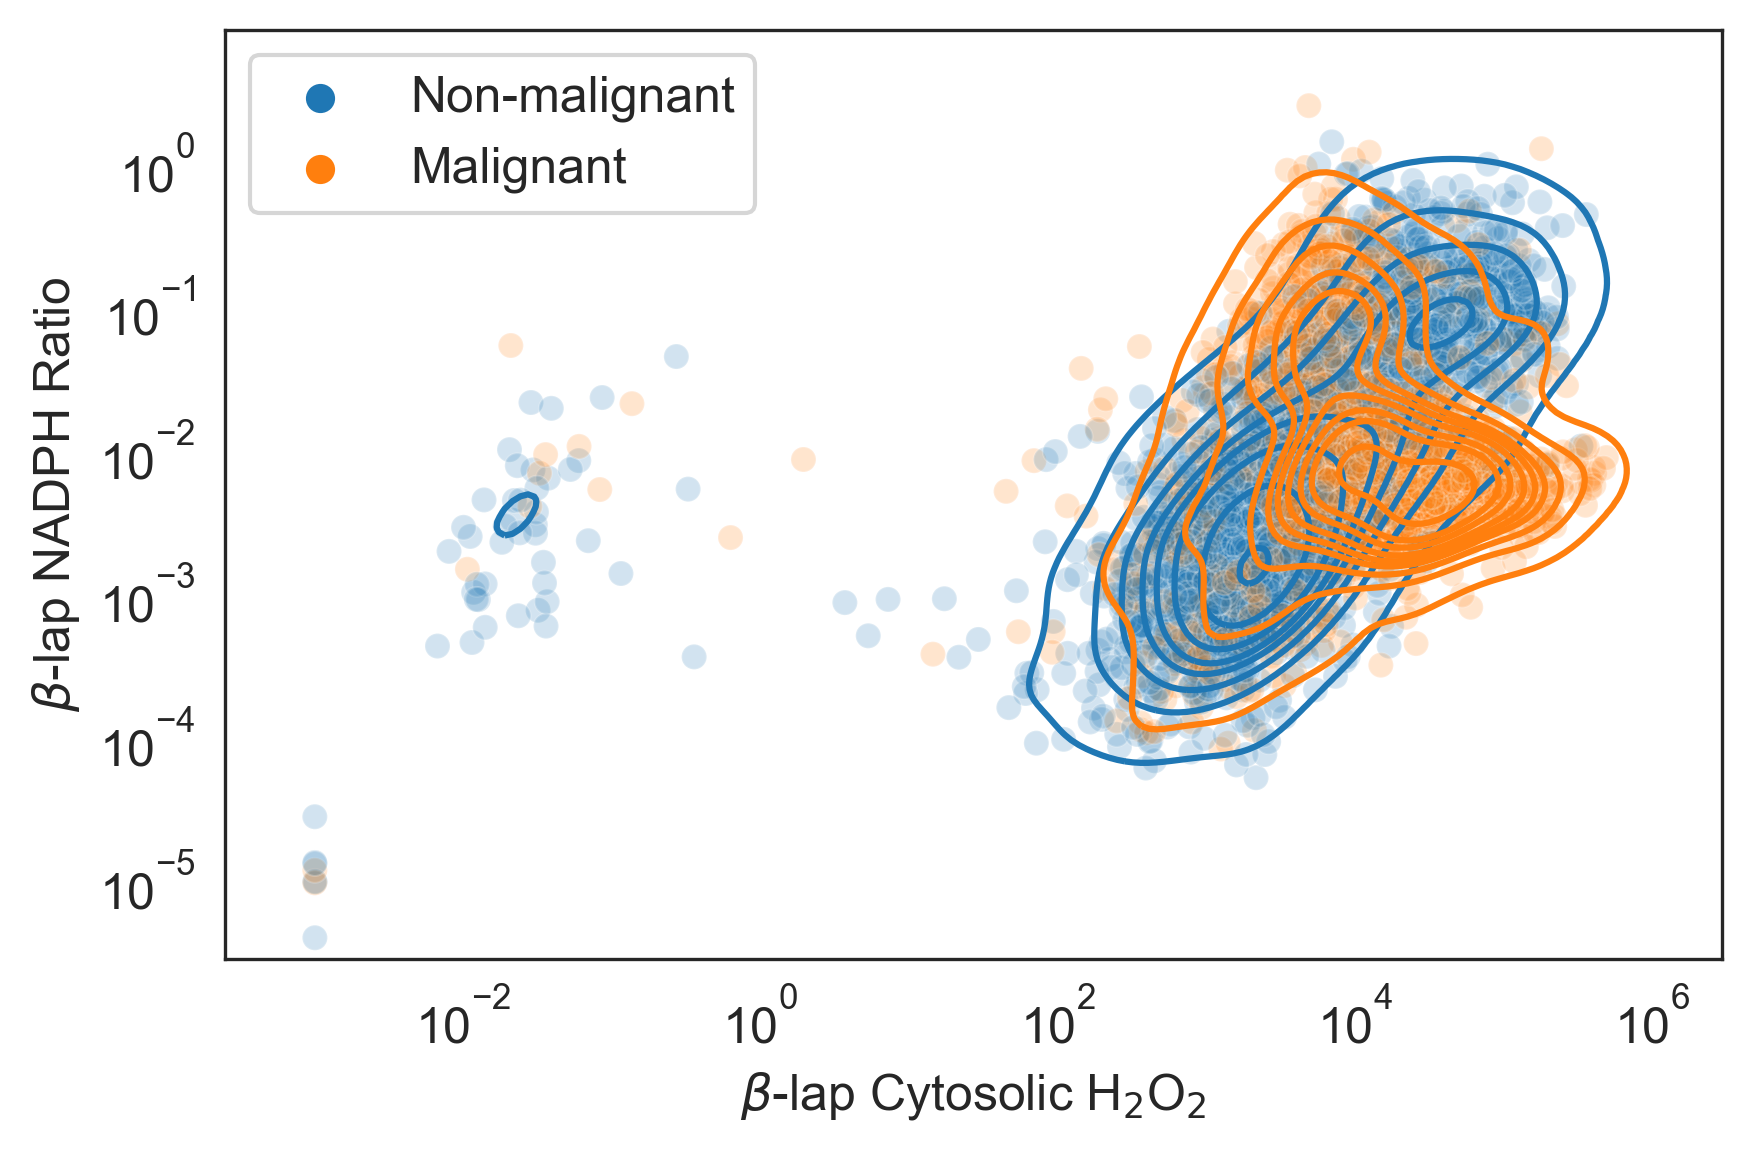

In [26]:
# compare density
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
plt.yscale("log")
plt.xscale("log")
sns.kdeplot(data=data,x="blap Cytosolic H2O2",y="blap NADPH Ratio",hue="Malignant",ax=ax,levels=10)
g = sns.scatterplot(x=data["blap Cytosolic H2O2"],y=data["blap NADPH Ratio"],hue=data["Malignant"],ax=ax,alpha=.2)
g.legend_.set_title(None)
plt.xlabel(r'$\beta$-lap Cytosolic H$_2$O$_2$')
plt.ylabel(r'$\beta$-lap NADPH Ratio')
plt.tight_layout()
plt.savefig("20230316_DensityPlot_malignanthue.png")
plt.show()

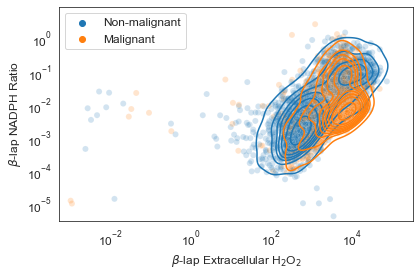

In [16]:
# compare density
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
plt.yscale("log")
plt.xscale("log")
sns.kdeplot(data=data,x="blap Extracellular H2O2",y="blap NADPH Ratio",hue="Malignant",ax=ax)
g = sns.scatterplot(x=data["blap Extracellular H2O2"],y=data["blap NADPH Ratio"],hue=data["Malignant"],ax=ax,alpha=.2)
g.legend_.set_title(None)
plt.xlabel(r'$\beta$-lap Extracellular H$_2$O$_2$')
plt.ylabel(r'$\beta$-lap NADPH Ratio')
plt.tight_layout()
plt.savefig("20230112_DensityPlot_extracellular_malignanthue.png")

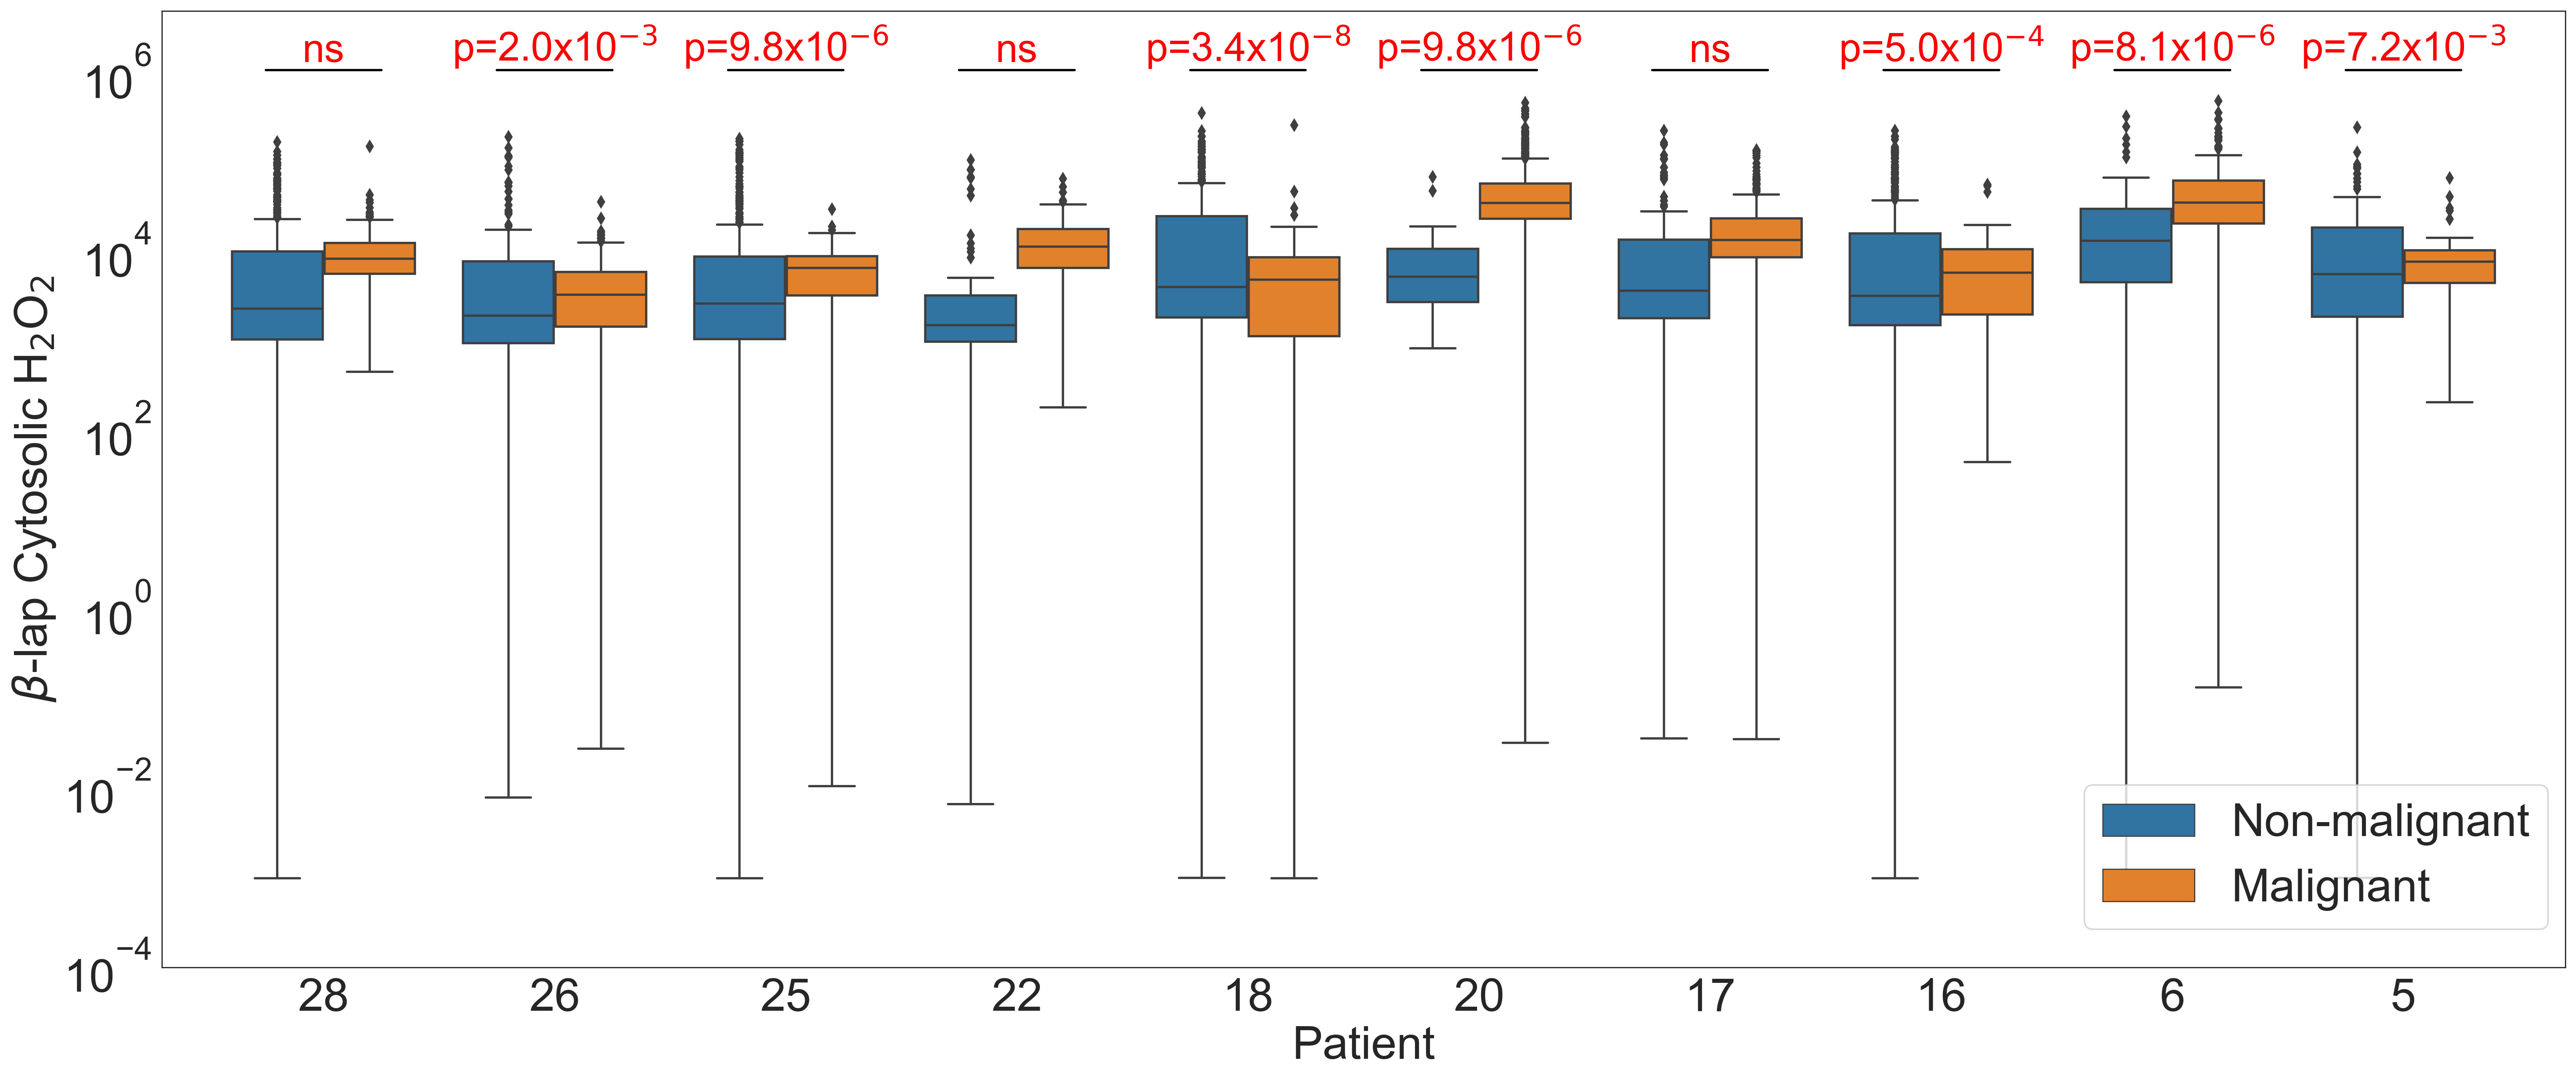

In [24]:
def sci_notation(number, sig_fig=1):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return a + "x10"+r"$^{"+str(b)+"}$"

# Plot blap H2O2 per patient per cell type
sns.set_style("white")
plt.rcParams.update({'font.size': 30,"figure.dpi": 300})
fig, ax = plt.subplots()

fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap Cytosolic H2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.80,.04))
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["28","26","25","22","18","20","17","16","6","5"],
       ylabel=r'$\beta$-lap Cytosolic H$_2$O$_2$',
       ylim = (10**-4,5*10**6))

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["blap Cytosolic H2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["blap Cytosolic H2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p='+ sci_notation(p_val) if p_val < .05 else "ns"]
    
y, h, col = data['blap Cytosolic H2O2'].max() + .6e6, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=26)
plt.tight_layout()
#plt.rcParams.update({'font.size': 16})
plt.savefig("20230316_scrnaseq_blap_cytoH2O2.png")
plt.show()

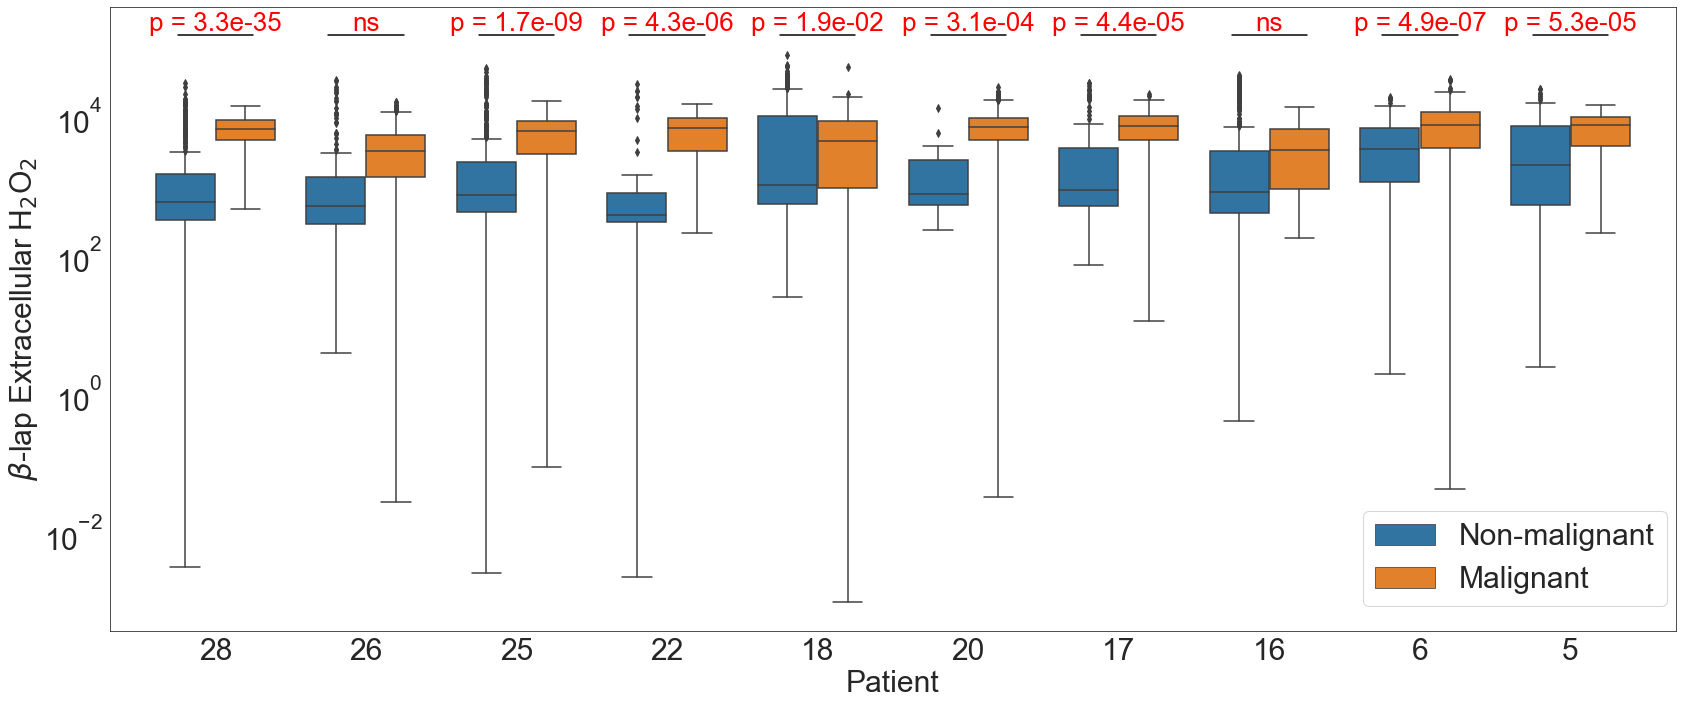

In [17]:
# Plot blap H2O2 per patient per cell type
sns.set_style("white")
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots()

fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap Extracellular H2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.80,.04))
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["28","26","25","22","18","20","17","16","6","5"],
       ylabel=r'$\beta$-lap Extracellular H$_2$O$_2$')

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["blap Extracellular H2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["blap Extracellular H2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.1e' % p_val if p_val < .05 else "ns"]
    
y, h, col = data['blap Extracellular H2O2'].max() + .7e5, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=26)
plt.tight_layout()
#plt.rcParams.update({'font.size': 16})
plt.savefig("20230112_scrnaseq_blap_extraH2O2.png")
plt.show()

In [17]:
p_vals

['ns',
 'ns',
 'p = 9.5e-07',
 'ns',
 'p = 2.3e-03',
 'ns',
 'ns',
 'ns',
 'p = 9.6e-04',
 'p = 1.3e-03']

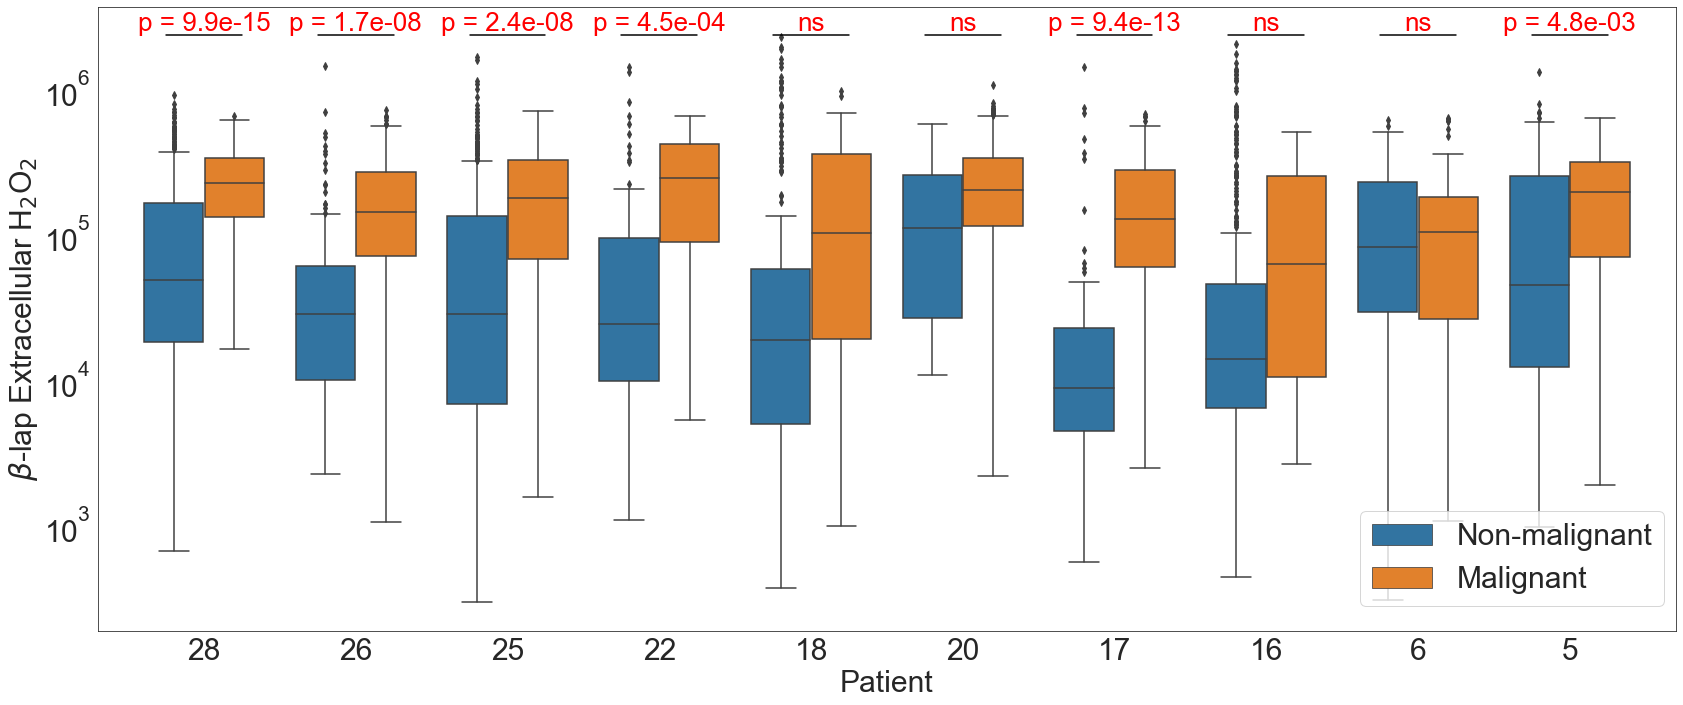

In [41]:
# Plot blap H2O2 per patient per cell type
sns.set_style("white")
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots()

fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap Extracellular H2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.80,.04))
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["28","26","25","22","18","20","17","16","6","5"],
       ylabel=r'$\beta$-lap Extracellular H$_2$O$_2$')

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["blap Extracellular H2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["blap Extracellular H2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.1e' % p_val if p_val < .05 else "ns"]
    
y, h, col = data['blap Extracellular H2O2'].max() + .7e5, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=26)
plt.tight_layout()
#plt.rcParams.update({'font.size': 16})
plt.savefig("20220419_scrnaseq_blap_extraH2O2.png")
plt.show()

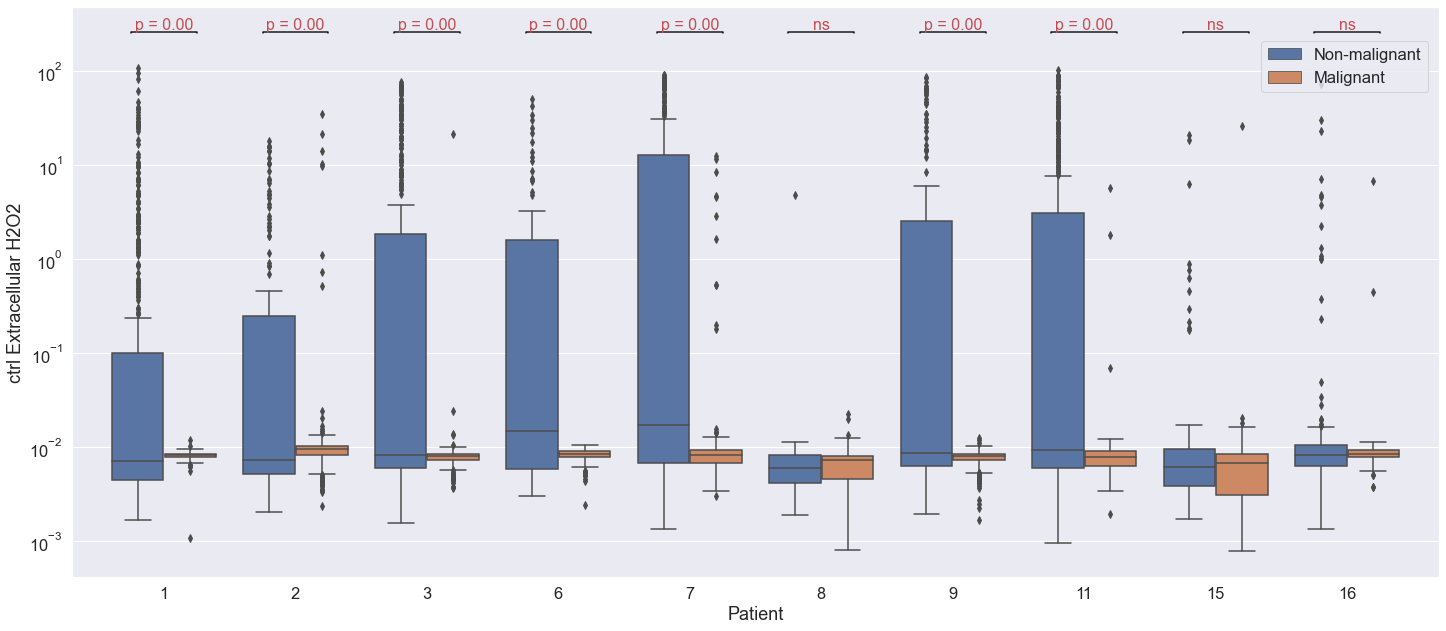

In [21]:
# Plot control H2O2 per patient per cell type
#for variable in ["ctrl Extracellular H2O2","blap Extracellular H2O2", "Relative Change H2O2", 
                # "Relative Change in NADPH/NADP+ Ratio", "Relative Change in GSH/GSSG Ratio", "Relative Change in Trx1-SH/Trx1-SS Ratio"]:
sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="ctrl Extracellular H2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.85))

ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="ctrl Extracellular H2O2")

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["ctrl Extracellular H2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["ctrl Extracellular H2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]

y, h, col = data['ctrl Extracellular H2O2'].max() + 150, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
#plt.savefig("scrnaseq_ctrl_extraH2O2.png")
plt.show()

In [ ]:
# Relative H2O2 blap/ctrl per patient per cell type

fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="Relative Change H2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.85))
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in Extracellular H2O2"
      )

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["Relative Change H2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["Relative Change H2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]
    
y, h, col = data['Relative Change H2O2'].max() + 1e7, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
plt.savefig("blap_effect_scrnaseq_extraH2O2.png")

In [ ]:
# Relative intraH2O2 blap/ctrl per patient per cell type
#sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="Relative Change intraH2O2",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.85))
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in Cytosolic H2O2",
      )

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["Relative Change intraH2O2"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["Relative Change intraH2O2"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]
    
y, h, col = data['Relative Change intraH2O2'].max() + 1e7, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
plt.savefig("blap_effect_scrnaseq_intraH2O2.png")

In [28]:
healthy_r_vals = list()
cancer_r_vals = list()
ode_genes = ["NQO1","POR","GSTP1","SOD1","AQP3","PRDX1","PRDX2",
             "GPX1","CAT","GSR","G6PD","TXNRD1","GLRX"]
for gene in ode_genes:
    slope, intercept, r_value, p_value, std_err = linregress(data[data["Malignant"] == "Non-malignant"][gene], data[data["Malignant"] == "Non-malignant"]["Relative Change H2O2"])
    healthy_r_vals = healthy_r_vals + [r_value]
    slope, intercept, r_value, p_value, std_err = linregress(data[data["Malignant"] == "Malignant"][gene], data[data["Malignant"] == "Malignant"]["Relative Change H2O2"])
    cancer_r_vals = cancer_r_vals + [r_value]
    #fig, ax = plt.subplots()
    #ax.scatter(data[gene], data["Relative Change H2O2"])
    #plt.text(data[gene].max()*.80, data["Relative Change H2O2"].max()*.80, 'r = %.3f' % r_value, ha='center', va='bottom', color=col)
    #ax.set(title = gene,
    #      ylabel="")
    #plt.show()
    #plt.savefig(gene+"_rval.png")






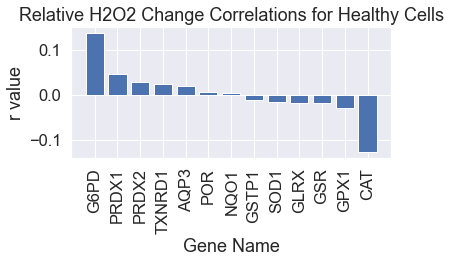

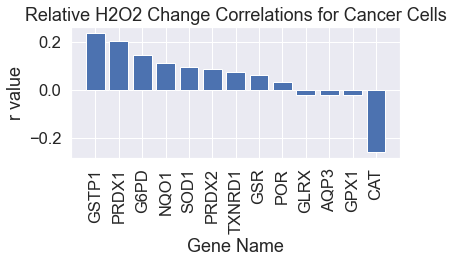

In [29]:
df = pd.DataFrame()
df["Gene"] = ode_genes
df["r"] = healthy_r_vals
df = df.sort_values(by="r",ascending=False)
fig, ax = plt.subplots()
ax.bar(df["Gene"],df["r"])
ax.set(title = "Relative H2O2 Change Correlations for Healthy Cells",
      ylabel="r value",
      xlabel="Gene Name")
plt.xticks(rotation=90)
fig.tight_layout()
plt.savefig("relativeh2o2_correlation_healthy_r.png")
plt.show()

df = pd.DataFrame()
df["Gene"] = ode_genes
df["r"] = cancer_r_vals
df = df.sort_values(by="r",ascending=False)
fig, ax = plt.subplots()
ax.bar(df["Gene"],df["r"])
ax.set(title = "Relative H2O2 Change Correlations for Cancer Cells",
      ylabel="r value",
      xlabel="Gene Name")
plt.xticks(rotation=90)
fig.tight_layout()
plt.savefig("relativeh2o2_correlation_cancer_r.png")
plt.show()


In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap NADPH Ratio",hue="Malignant",data=data,ax=ax)
ax.set(yscale = "log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="NADPH Ratio")

In [ ]:
#sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="Relative Change in NADPH/NADP+ Ratio",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.85))
ax.set(ylim=(-1,-0.885),
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in NADPH/NADP+ Ratio")

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["Relative Change in NADPH/NADP+ Ratio"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["Relative Change in NADPH/NADP+ Ratio"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]
    
y, h, col = -.89, .001, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
plt.savefig("blap_effect_scrnaseq_NADPH.png")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap GSH/GSSG Ratio",hue="Malignant",data=data,ax=ax)
ax.set(
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="GSH/GSSG Ratio")

In [ ]:
#sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="Relative Change in GSH/GSSG Ratio",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.85))
ax.set(ylim=(-10,11),
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in GSH/GSSG Ratio")

p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["Relative Change in GSH/GSSG Ratio"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["Relative Change in GSH/GSSG Ratio"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]
    
y, h, col = 10, .2, 'k'
#y, h, col = data['Relative Change intraH2O2'].max() + 1e7, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
plt.savefig("blap_effect_scrnaseq_GSH.png")

In [ ]:
#sns.set(font_scale=1.5)  # crazy big
fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="ctrl Trx1-SH/Trx1-SS Ratio",hue="Malignant",data=data,ax=ax)
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in Trx1-SH/Trx1-SS Ratio")
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="blap Trx1-SH/Trx1-SS Ratio",hue="Malignant",data=data,ax=ax)
ax.set(yscale="log",
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in Trx1-SH/Trx1-SS Ratio")
plt.show()


In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Patient",y="Relative Change in Trx1-SH/Trx1-SS Ratio",hue="Malignant",data=data,ax=ax)
ax.legend(loc=(.87,.82))
ax.set(
       xlabel="Patient",
       xticklabels=["1","2","3","6","7","8","9","11","15","16"],
       ylabel="Relative Change in Trx1-SH/Trx1-SS Ratio")
p_vals = list()
patients =[1,2,3,6,7,8,9,11,15,16]
for patient in patients:
    junk, p_val = ttest_ind(data[(data["Patient"] == patient) & (data["Malignant"] == "Non-malignant")]["Relative Change in Trx1-SH/Trx1-SS Ratio"],
                                data[(data["Patient"] == patient) & (data["Malignant"] == "Malignant")]["Relative Change in Trx1-SH/Trx1-SS Ratio"],
                                 equal_var=False)
    p_vals = p_vals + ['p = %.2f' % p_val if p_val < .05 else "ns"]
    
y, h, col = -.3, .02, 'k'
#y, h, col = data['Relative Change intraH2O2'].max() + 1e7, 2, 'k'
for patient,p_val in zip(range(10),p_vals):
    plt.plot([patient-.25, patient-.25, patient+.25, patient+.25], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text(patient, y+h, str(p_val), ha='center', va='bottom', color="r",size=16)
plt.savefig("blap_effect_scrnaseq_Trx1.png")

In [ ]:
plt.scatter(data["G6PD"],data["Relative Change H2O2"])

In [ ]:
# Relative H2O2 blap/ctrl per patient per cell type

fig, ax = plt.subplots()
fig.set_size_inches(24.5, 10.5)
sns.boxplot(x="Stromal Cell Type",y="Relative Change H2O2",data=data[(data["Malignant"] == "Non-malignant")],ax=ax)
ax.set(yscale="log",
       xlabel="Cell Type",
       ylabel="Relative Change in Extracellular H2O2"
      )


plt.savefig("blap_effect_scrnaseq_extraH2O2_bycell.png")

In [9]:
from sklearn.cross_decomposition import PLSRegression
ode_genes = ["NQO1","POR","GSTP1","SOD1","AQP3","PRDX1","PRDX2",
             "GPX1","CAT","GSR","G6PD","TXNRD1","GLRX"]


In [10]:
# 3 7 9 and 11 are significantly differnt
# 6 20 and 22 on tSNE are high
# Label malignant and non-malignant cells
data["Malignant"] = data["Cell Type"].where(data["Cell Type"] == 0.0,"Non-malignant")
data["Malignant"]= data["Malignant"].where(data["Malignant"] == "Non-malignant","Malignant")

# Create relative extraH2O2 change variable
data["Relative Change H2O2"] = (data["blap Extracellular H2O2"] - data["ctrl Extracellular H2O2"])/data["ctrl Extracellular H2O2"]

# Create relative intraH2O2 change variable
data["Relative Change intraH2O2"] = (data["blap Cytosolic H2O2"] - data["ctrl Cytosolic H2O2"])/data["ctrl Cytosolic H2O2"]

# Create NADPH/NADPH+ ratio variable
data["ctrl NADPH Ratio"] = data["ctrl NADPH"]/data["ctrl NADP+"]
data["blap NADPH Ratio"] = data["blap NADPH"]/data["blap NADP+"]

# Create relative change in NADPH/NADP+ between blap/ctrl
data["Relative Change in NADPH/NADP+ Ratio"] = (data["blap NADPH Ratio"] - data["ctrl NADPH Ratio"])/data["ctrl NADPH Ratio"]

# Create GSH ratio and relative variables
data["ctrl GSH/GSSG Ratio"] = data["ctrl GSH"]/data["ctrl GSSG"]
data["blap GSH/GSSG Ratio"] = data["blap GSH"]/data["blap GSSG"]
data["Relative Change in GSH/GSSG Ratio"] = (data["blap GSH/GSSG Ratio"] - data["ctrl GSH/GSSG Ratio"])/data["ctrl GSH/GSSG Ratio"]

# Create Trx ratio and relative variables
data["ctrl Trx1-SH/Trx1-SS Ratio"] = data["ctrl Trx1-SH"]/data["ctrl Trx1-SS"]
data["blap Trx1-SH/Trx1-SS Ratio"] = data["blap Trx1-SH"]/data["blap Trx1-SS"]
data["Relative Change in Trx1-SH/Trx1-SS Ratio"] = (data["blap Trx1-SH/Trx1-SS Ratio"] - data["ctrl Trx1-SH/Trx1-SS Ratio"])/data["ctrl Trx1-SH/Trx1-SS Ratio"]

In [11]:
data.head()

,ctrl Extracellular H2O2,ctrl Cytosolic H2O2,ctrl GPXr,ctrl GPXo,ctrl GPX-SG,ctrl GSH,ctrl GSSG,ctrl Cat,ctrl Peroxisomal H2O2,ctrl Prx1/2-SH,...,Relative Change intraH2O2,ctrl NADPH Ratio,blap NADPH Ratio,Relative Change in NADPH/NADP+ Ratio,ctrl GSH/GSSG Ratio,blap GSH/GSSG Ratio,Relative Change in GSH/GSSG Ratio,ctrl Trx1-SH/Trx1-SS Ratio,blap Trx1-SH/Trx1-SS Ratio,Relative Change in Trx1-SH/Trx1-SS Ratio
0,0.008233,0.008570,5.796700e-03,0.172270,0.000689,0.38207,1.7813,0.182150,0.004160,7.536300,...,1425.687671,5.528884,0.011710,-0.997882,0.214489,0.326522,0.522323,4.651429,0.007072,-0.998480
1,4.241700,4.437300,6.486900e-07,0.006197,0.000025,0.69661,0.9770,0.016880,4.040500,0.004215,...,1.945034,0.035115,0.002126,-0.939467,0.713009,23.724390,32.273610,0.015118,0.000854,-0.943477
2,0.008642,0.008980,5.280800e-04,0.034551,0.000138,0.18296,1.7809,0.159470,0.004658,7.293500,...,9195.240660,32.705207,0.038155,-0.998833,0.102735,0.123504,0.202165,5.344410,0.588752,-0.889838
3,0.009007,0.009378,2.731100e-03,0.085505,0.000342,0.40139,1.6835,0.006836,0.009019,6.803200,...,9599.328439,1.636846,0.004156,-0.997461,0.238426,299.393660,1254.709475,0.889822,0.001106,-0.998757
4,0.007744,0.007744,4.319400e-03,0.039403,0.000158,1.10890,1.7739,0.233190,0.003286,9.322800,...,13364.185950,57.198010,1.026214,-0.982059,0.625120,0.634981,0.015775,3.894419,0.630154,-0.838190


In [36]:
X = norm_data[ode_genes].values.tolist()
Y = norm_data[["blap Extracellular H2O2", "blap NADPH Ratio", "blap GSH/GSSG Ratio", "blap Trx1-SH/Trx1-SS Ratio"]].values.tolist()

KeyError: "None of [Index(['NQO1', 'POR', 'GSTP1', 'SOD1', 'AQP3', 'PRDX1', 'PRDX2', 'GPX1', 'CAT',\n       'GSR', 'G6PD', 'TXNRD1', 'GLRX'],\n      dtype='object')] are in the [columns]"

In [37]:
norm_data

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,-0.999992,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.739135,-1.000000,-0.642261,...,-1.0,-0.540535,-0.438561,0.789298,-0.999970,-0.681780,0.458544,0.632081,-0.997519,-0.999980
1,-0.996076,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.976550,-0.999998,-0.999800,...,-1.0,-0.591783,-0.443879,0.789302,-0.999958,-0.681758,0.458544,-0.994714,-0.999700,-0.999240
2,-0.999992,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.771715,-1.000000,-0.653787,...,-1.0,-0.287024,-0.423885,0.789298,-0.999973,-0.681780,0.458544,0.875235,-0.793434,-0.998518
3,-0.999992,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.990979,-1.000000,-0.677061,...,-1.0,-0.576841,-0.442752,0.789298,-0.999970,-0.681493,0.458544,-0.687797,-0.999612,-0.999983
4,-0.999993,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.665814,-1.000000,-0.557459,...,-1.0,-0.058547,0.124430,0.789299,-0.999960,-0.681780,0.458544,0.366460,-0.778908,-0.997823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,-0.999994,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.972495,-1.000000,-0.670467,...,-1.0,-0.189802,-0.410855,0.789298,-0.999886,-0.681559,0.458544,0.348110,-0.980487,-0.999805
4988,-0.999992,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.958529,-1.000000,-0.658306,...,-1.0,-0.187396,-0.442639,0.789298,-0.999974,-0.681780,0.458544,0.974705,-0.947841,-0.999645
4989,-0.999993,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.753313,-1.000000,-0.638758,...,-1.0,-0.185142,-0.438800,0.789298,-0.999974,-0.681780,0.458544,0.463833,-0.995260,-0.999956
4990,-0.999993,-1.0,-0.981019,1.0,-0.85136,1.0,0.723636,-0.939140,-1.000000,-0.542833,...,-1.0,-0.068415,-0.441485,0.789298,-0.999968,-0.681780,0.458544,0.971757,-0.924353,-0.999484


In [27]:
data = data.drop(columns = "Malignant")

In [35]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler((-1,1))
norm_data = scaler.fit_transform(data)
#norm_data = pd.DataFrame(norm_data)

In [29]:
pls_model = PLSRegression(n_components=2)
pls_model.fit(X,Y)

PLSRegression()

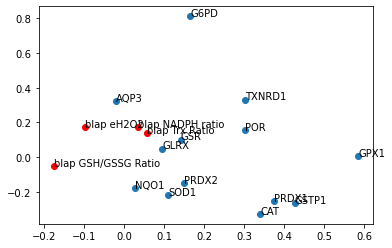

In [30]:
plt.scatter(pls_model.x_loadings_[:,0].tolist(),pls_model.x_loadings_[:,1].tolist())
for i, txt in enumerate(ode_genes):
    #print(pls_model.x_loadings_[:,1].tolist()[i])
    plt.annotate(txt, (pls_model.x_loadings_[:,0].tolist()[i],pls_model.x_loadings_[:,1].tolist()[i]))
    
plt.scatter(pls_model.y_loadings_[:,0].tolist(),pls_model.y_loadings_[:,1].tolist(), color="red")
for i, txt in enumerate(["blap eH2O2", "blap NADPH ratio", "blap GSH/GSSG Ratio", "blap Trx Ratio"]):
    #print(pls_model.x_loadings_[:,1].tolist()[i])
    plt.annotate(txt, (pls_model.y_loadings_[:,0].tolist()[i],pls_model.y_loadings_[:,1].tolist()[i]))

#plt.savefig("first_plsr.png")